In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import warnings 
warnings.filterwarnings('ignore')

np.random.seed(0)

In [66]:
file_path = "Churn_Modelling.csv"
data = pd.read_csv(file_path)

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Attributes

- **RowNumber**: Số thứ tự của bản ghi.
- **CustomerId**: Mã số khách hàng.
- **Surname**: Họ của khách hàng.
- **CreditScore**: Điểm tín dụng của khách hàng.
- **Geography**: Quốc gia của khách hàng.
- **Gender**: Giới tính của khách hàng.
- **Age**: Tuổi của khách hàng.
- **Tenure**: Thời gian khách hàng gắn bó với ngân hàng.
- **Balance**: Số dư tài khoản của khách hàng.
- **NumOfProducts**: Số lượng sản phẩm ngân hàng mà khách hàng đang sử dụng.
- **HasCrCard**: Khách hàng có sở hữu thẻ tín dụng hay không.
- **IsActiveMember**: Khách hàng có phải là thành viên hoạt động hay không.
- **EstimatedSalary**: Mức lương ước tính của khách hàng.
- **Exited**: Biến mục tiêu, cho biết khách hàng có rời ngân hàng hay không (1 là có, 0 là không).

# I. Data Exploration

## 1. Check for missing values

In [67]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 2. Get summary statistics for numerical features

In [68]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


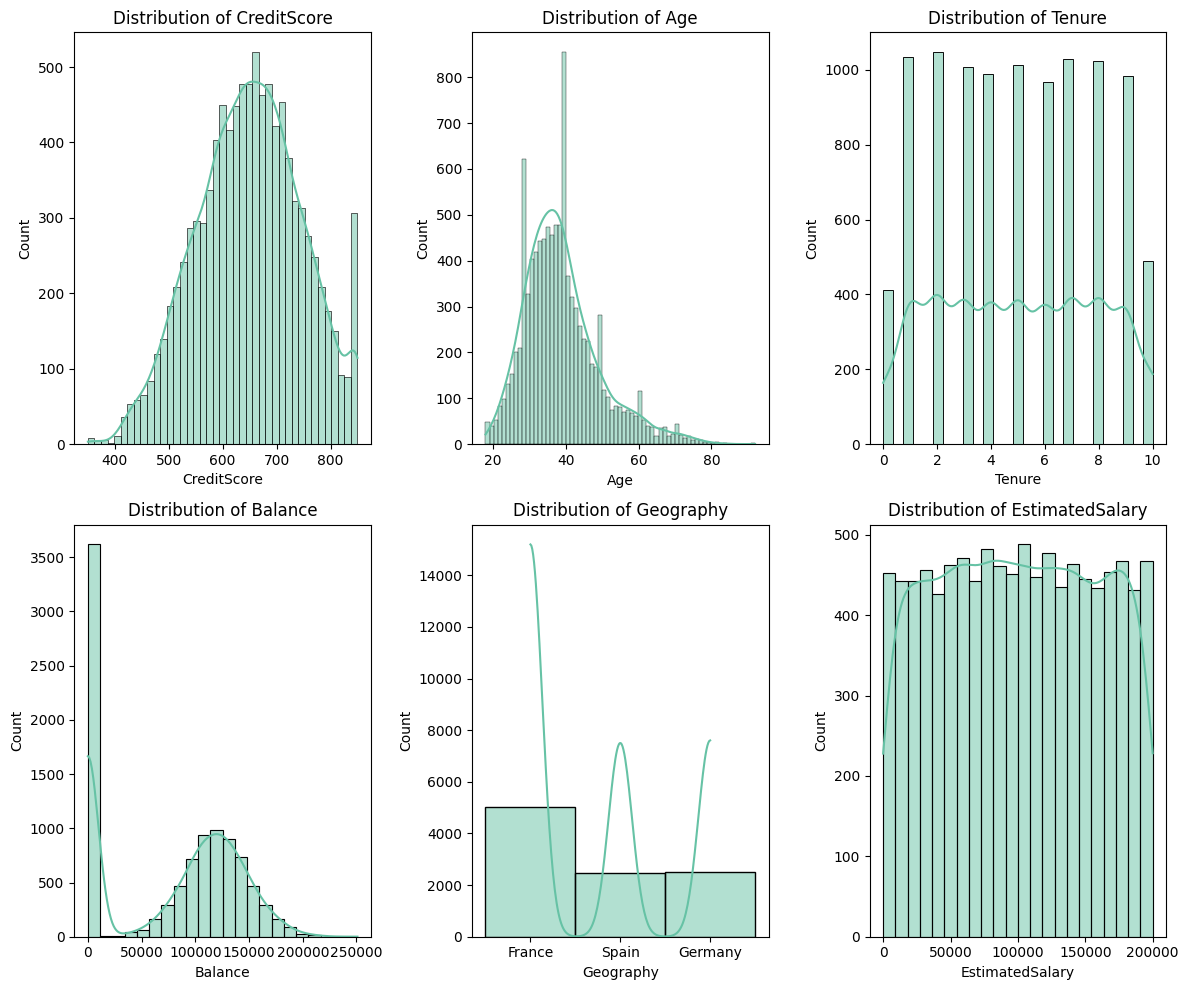

In [69]:
plt.figure(figsize=(12, 10))

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Geography', 'EstimatedSalary']

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## 3. Distribution of customers by age & Exited status count by age group

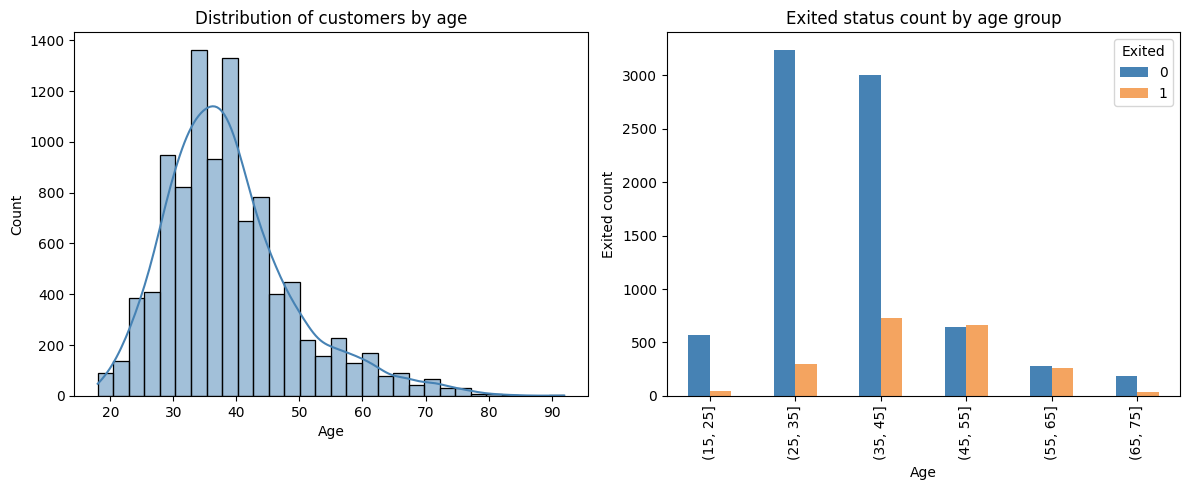

In [70]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of customers by age")
plt.xlabel("Age")
plt.ylabel("Count")

age_bins = pd.cut(data['Age'], bins=[15, 25, 35, 45, 55, 65, 75])
age_exit = data.groupby([age_bins, 'Exited']).size().unstack().fillna(0)

plt.subplot(1, 2, 2)
age_exit.plot(kind='bar', stacked=False, color=["steelblue", "sandybrown"], ax=plt.gca())
plt.title("Exited status count by age group")
plt.xlabel("Age")
plt.ylabel("Exited count")
plt.legend(title="Exited", labels=["0", "1"])

plt.tight_layout()
plt.show()

## 4. Customer Geography Disribution

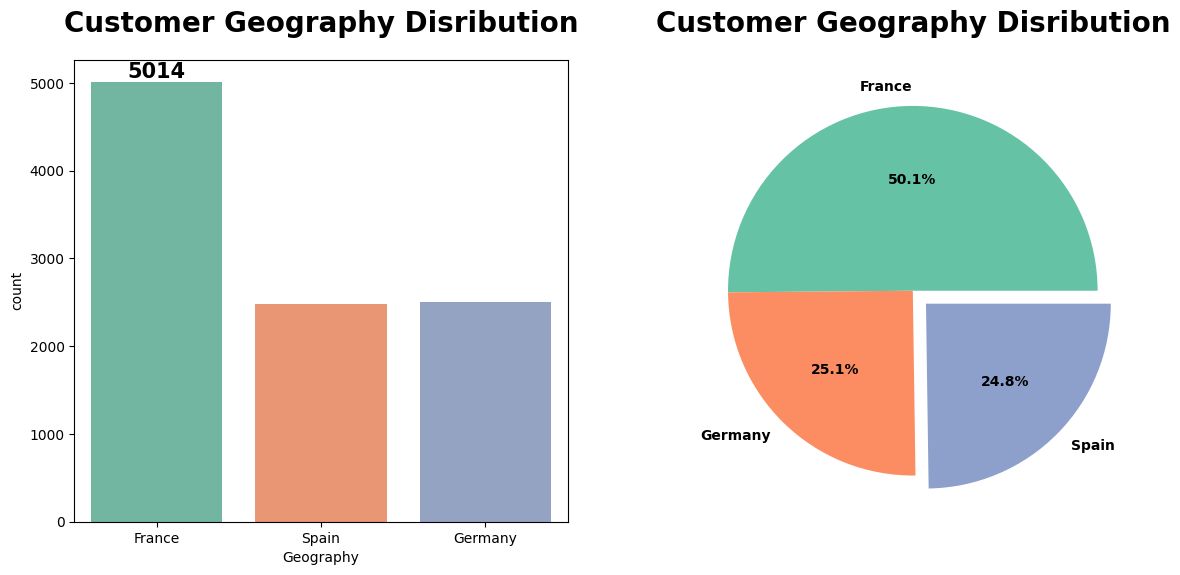

In [71]:
count = data["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=data, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

## 5. Scatter matrix & Correlation Matrix

<Figure size 1200x1000 with 0 Axes>

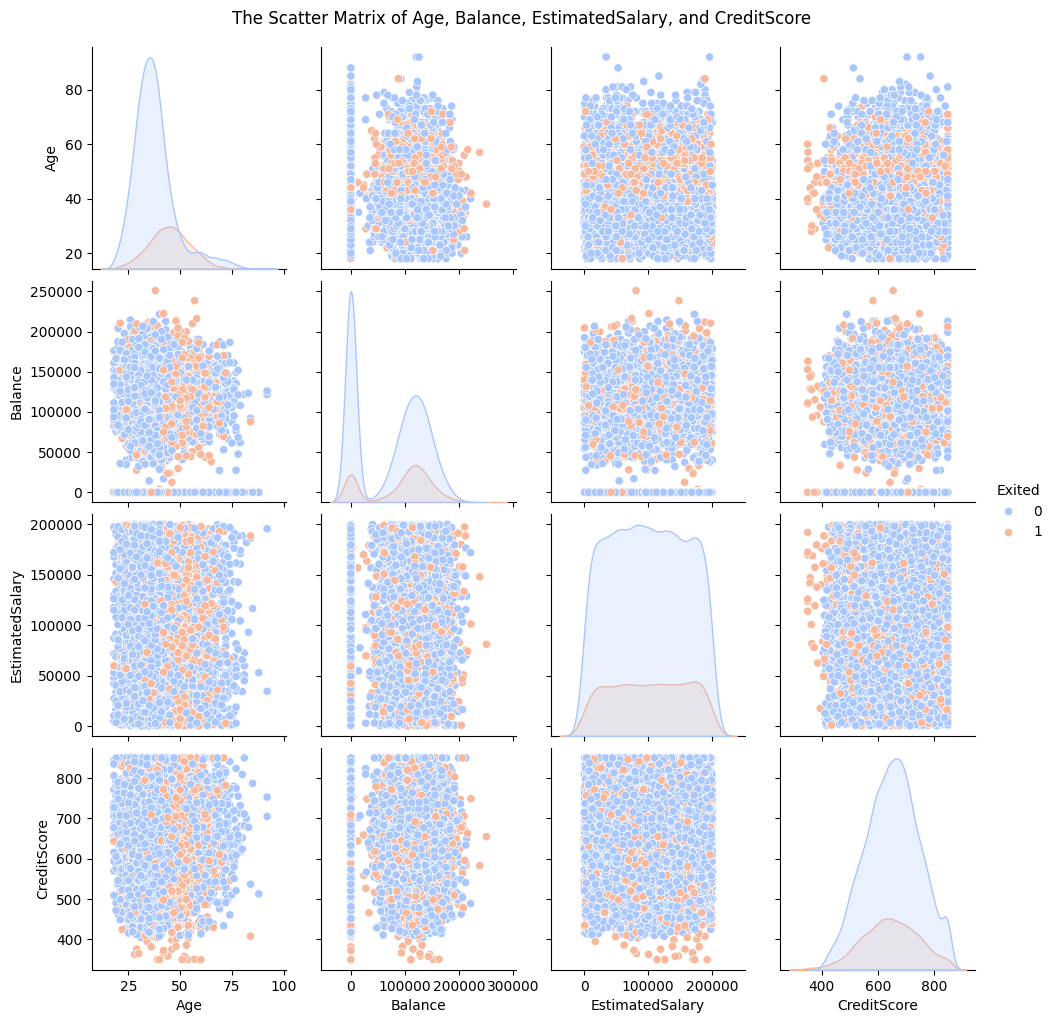

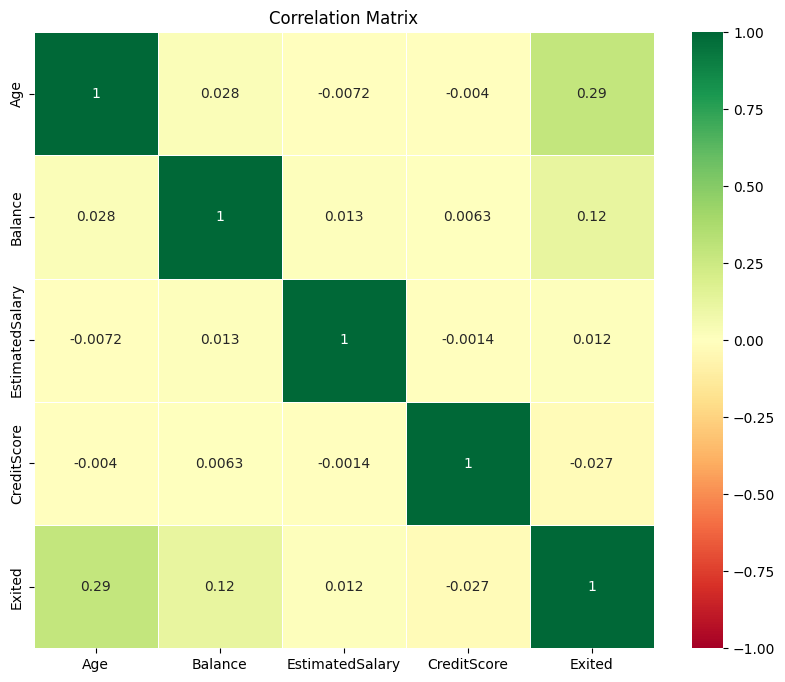

In [72]:

plt.figure(figsize=(12, 10))
sns.pairplot(data[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']], hue='Exited', palette='coolwarm')
plt.suptitle('The Scatter Matrix of Age, Balance, EstimatedSalary, and CreditScore', y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = data[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 6. Visualizing the churn rate

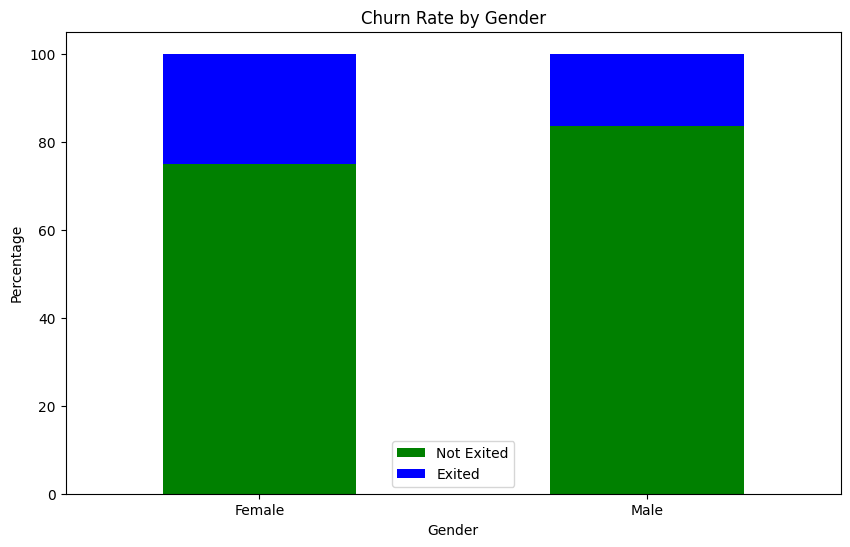

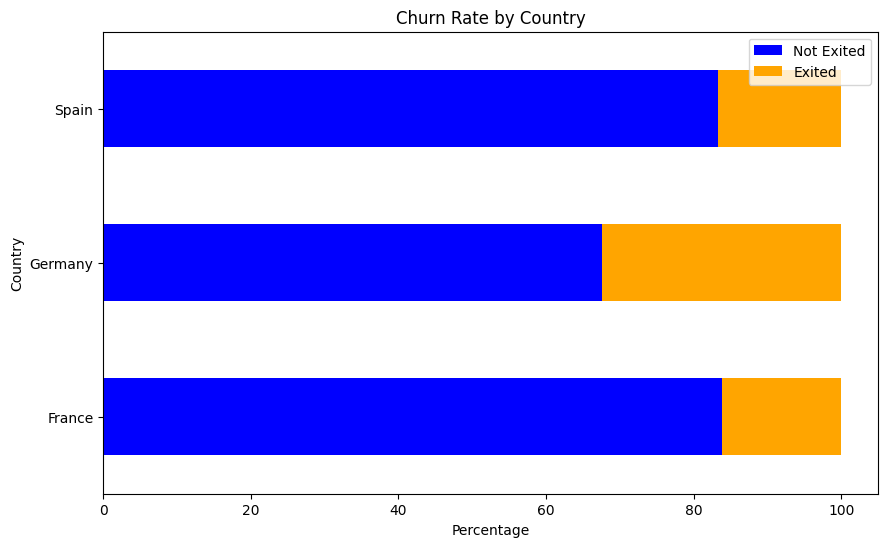

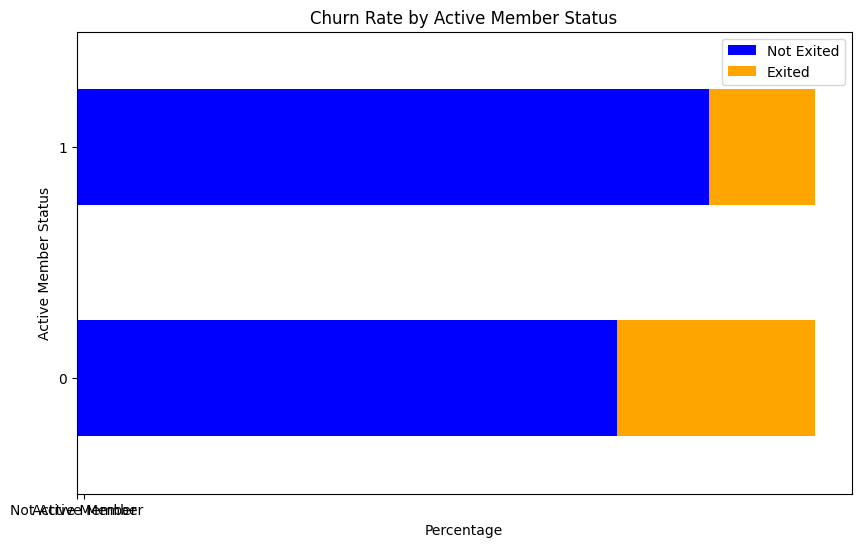

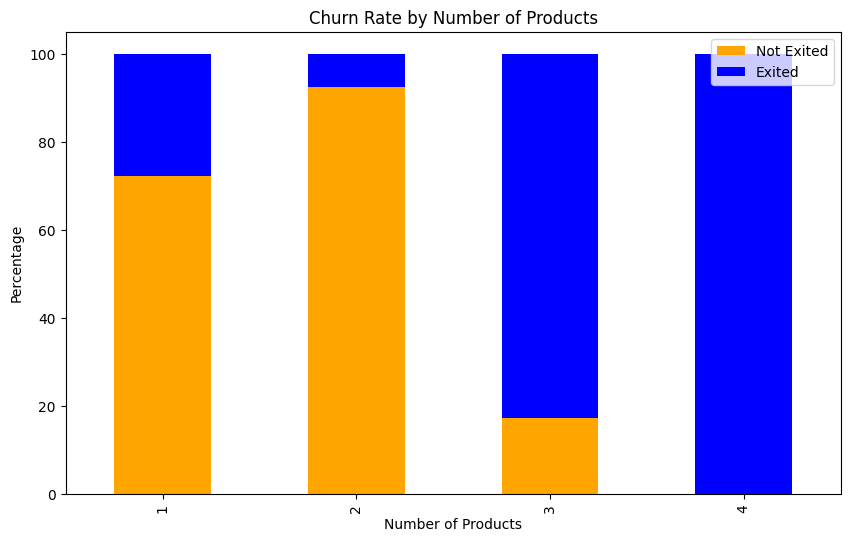

In [73]:
# (a) Churn Rate by Gender
plt.figure(figsize=(10, 6))
gender_churn = data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack() * 100
gender_churn.plot(kind='bar', stacked=True, color=['green', 'blue'], ax=plt.gca())
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (b) Churn Rate by Country
plt.figure(figsize=(10, 6))
country_churn = data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack() * 100
country_churn.plot(kind='barh', stacked=True, color=['blue', 'orange'], ax=plt.gca())
plt.title('Churn Rate by Country')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (c) Churn Rate by Active Member Status
plt.figure(figsize=(10, 6))
active_churn = data.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack() * 100
active_churn.plot(kind='barh', stacked=True, color=['blue', 'orange'], ax=plt.gca())
plt.title('Churn Rate by Active Member Status')
plt.xlabel('Percentage')
plt.ylabel('Active Member Status')
plt.xticks([0, 1], ['Not Active Member', 'Active Member'])
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (d) Churn Rate by Number of Products
plt.figure(figsize=(10, 6))
products_churn = data.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).unstack() * 100
products_churn.plot(kind='bar', stacked=True, color=['orange', 'blue'], ax=plt.gca())
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Percentage')
plt.legend(['Not Exited', 'Exited'])
plt.show()

## 7. Phân tích mất cân bằng dữ liệu (Class Imbalance)

  Class 0 (Not churned): 7,963 samples (79.63%)
  Class 1 (Churned):     2,037 samples (20.37%)

Imbalance ratio: 3.91:1
Churn rate: 20.37%


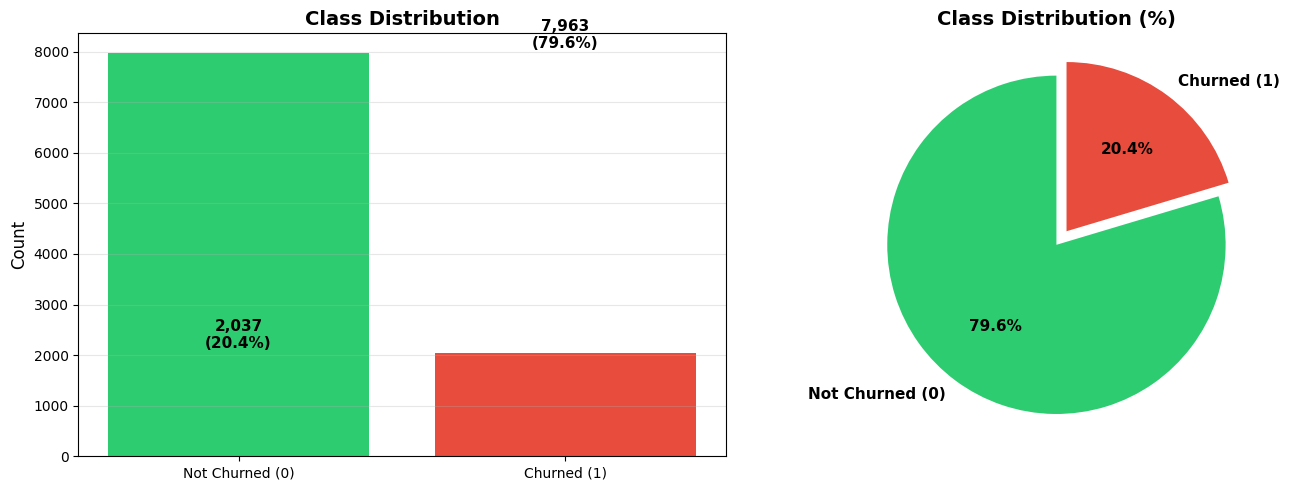

In [74]:
from collections import Counter

churn_counts = Counter(data['Exited'])
total = len(data)

print(f"  Class 0 (Not churned): {churn_counts[0]:,} samples ({churn_counts[0]/total*100:.2f}%)")
print(f"  Class 1 (Churned):     {churn_counts[1]:,} samples ({churn_counts[1]/total*100:.2f}%)")
print(f"\nImbalance ratio: {churn_counts[0]/churn_counts[1]:.2f}:1")
print(f"Churn rate: {churn_counts[1]/total*100:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['Not Churned (0)', 'Churned (1)'], 
            [churn_counts[0], churn_counts[1]], 
            color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, (label, count) in enumerate(churn_counts.items()):
    axes[0].text(i, count + 100, f'{count:,}\n({count/total*100:.1f}%)', 
                ha='center', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)
axes[1].pie([churn_counts[0], churn_counts[1]], 
           labels=['Not Churned (0)', 'Churned (1)'],
           autopct='%1.1f%%',
           colors=colors,
           explode=explode,
           startangle=90,
           textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# II. Data preparation

## 1. Encoder data

In [75]:
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])


encoder = OneHotEncoder(sparse_output=False)

geography_encoded = encoder.fit_transform(data[['Geography']])


geography_df = pd.DataFrame(geography_encoded, columns=encoder.get_feature_names_out(['Geography']))

data = pd.concat([data.drop('Geography', axis=1), geography_df], axis=1)

## 2. Drop Unneeded Columns

In [76]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [77]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


## 4. Define Features X and Target y

In [78]:
x_var = data.columns[data.columns != 'Exited']

y_var = ["Exited"]

In [79]:
X = data[x_var]
y = data[y_var]

In [80]:
X.shape

(10000, 12)

In [81]:
y.shape

(10000, 1)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# III. Improve

In [83]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [84]:
# Số lượng folds
n_folds = 5

# K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

In [85]:
def create_meta_learner():
    model = Sequential([
        Dense(6, activation='relu', input_dim=len(base_learners)),  
        Dense(6, activation='relu'), 
        Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

class ANNMetaLearner(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=100, batch_size=10):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = create_meta_learner()

    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int).flatten() 
    def predict_proba(self, X):
        probabilities = self.model.predict(X)  
        return np.column_stack((1 - probabilities, probabilities))  

In [ ]:
from collections import Counter

y_train_values = y_train.values.ravel()

counter = Counter(y_train_values)
majority_class = max(counter, key=counter.get)
minority_class = min(counter, key=counter.get)
total_samples = len(y_train_values)

class_weight = {cls: total_samples / (len(counter) * count) for cls, count in counter.items()}

scale_pos_weight = counter[majority_class] / counter[minority_class]

print(f"Class distribution: {counter}")
print(f"Class weights: {class_weight}")
print(f"Scale pos weight: {scale_pos_weight:.2f}") 

Class distribution: Counter({0: 6356, 1: 1644})
Class weights: {0: 0.6293266205160478, 1: 2.4330900243309004}
Scale pos weight: 3.87


In [87]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42, class_weight='balanced')),
    ('gnb', GaussianNB()), 
    ('knn', KNeighborsClassifier(n_neighbors=5)), 
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42, scale_pos_weight=scale_pos_weight)),
    ('logreg', LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'))
]

meta_learner = ANNMetaLearner(epochs=200, batch_size=10)

In [88]:
accuracy_scores = []
f1_scores = []
auc_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    base_learners_fold = base_learners.copy()

    stacking_model = StackingClassifier(
        estimators=base_learners_fold,
        final_estimator=meta_learner,
        cv=5,
        stack_method='predict_proba'
    )

    stacking_model.fit(X_train_scaled, y_train_ravel)

    y_pred = stacking_model.predict(X_test_scaled)
    y_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test_ravel, y_pred)
    f1 = f1_score(y_test_ravel, y_pred, pos_label=1, average='binary')
    auc = roc_auc_score(y_test_ravel, y_pred_proba)

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    auc_scores.append(auc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


In [89]:
accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores)
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

print("\n--- Final Results ---")
print(f"Mean Accuracy: {accuracy_mean:.2f}, Std Dev: {accuracy_std:.2f}")
print(f"Mean F1-Score: {f1_mean:.2f}, Std Dev: {f1_std:.2f}")
print(f"Mean AUC: {auc_mean:.2f}, Std Dev: {auc_std:.2f}")


--- Final Results ---
Mean Accuracy: 0.86, Std Dev: 0.00
Mean F1-Score: 0.58, Std Dev: 0.03
Mean AUC: 0.86, Std Dev: 0.01


# IV. Đánh giá chi tiết mô hình

## 1. Confusion Matrix và Classification Report

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

scaler_final = StandardScaler()
X_scaled = scaler_final.fit_transform(X)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

y_train_final = y_train_final.values.ravel()
y_test_final = y_test_final.values.ravel()

counter_final = Counter(y_train_final)
scale_pos_weight_final = counter_final[0] / counter_final[1]

print(f"Class distribution in training set:")
print(f"  Class 0 (Not churned): {counter_final[0]} ({counter_final[0]/len(y_train_final)*100:.2f}%)")
print(f"  Class 1 (Churned): {counter_final[1]} ({counter_final[1]/len(y_train_final)*100:.2f}%)")
print(f"  Imbalance ratio: {counter_final[0]/counter_final[1]:.2f}:1")
print(f"  Scale pos weight: {scale_pos_weight_final:.2f}")

Class distribution in training set:
  Class 0 (Not churned): 6370 (79.62%)
  Class 1 (Churned): 1630 (20.38%)
  Imbalance ratio: 3.91:1
  Scale pos weight: 3.91


In [91]:
base_learners_final = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42, class_weight='balanced')),
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42, 
                          scale_pos_weight=scale_pos_weight_final, eval_metric='logloss')),
    ('logreg', LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'))
]

meta_learner_final = ANNMetaLearner(epochs=200, batch_size=10)

stacking_final = StackingClassifier(
    estimators=base_learners_final,
    final_estimator=meta_learner_final,
    cv=5,
    stack_method='predict_proba'
)

stacking_final.fit(X_train_final, y_train_final)

y_pred_final = stacking_final.predict(X_test_final)
y_pred_proba_final = stacking_final.predict_proba(X_test_final)[:, 1]

print("Completed!")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Completed!


## 2. Confusion Matrix Visualization

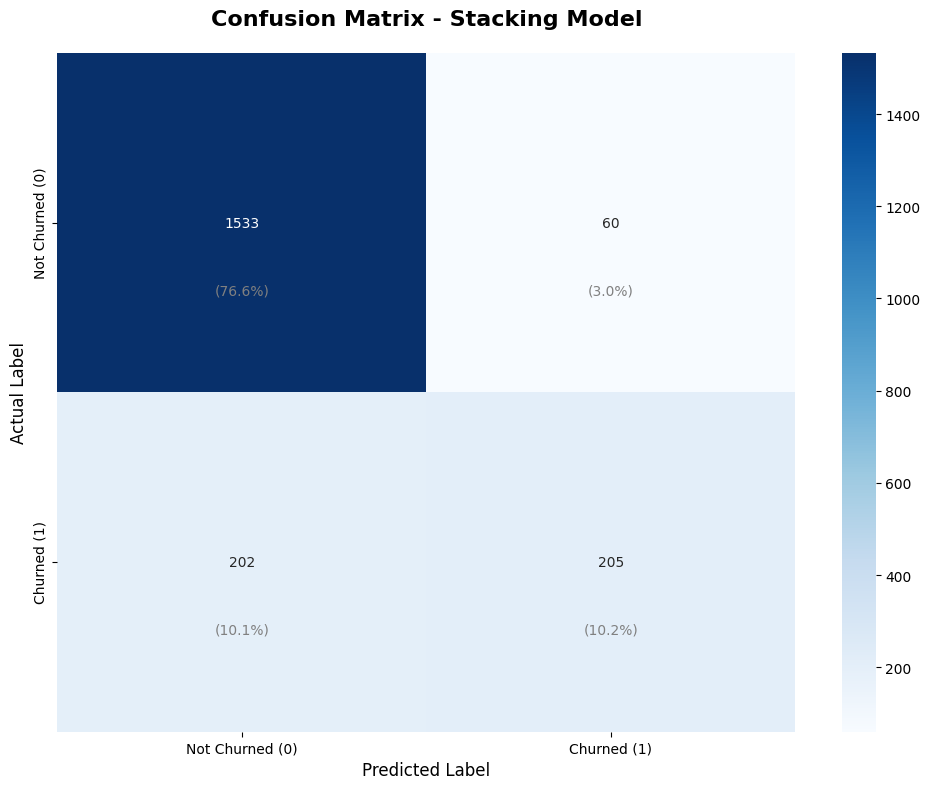

True Negatives (TN): 1533 - Correctly predicted NOT churned
False Positives (FP): 60 - Incorrectly predicted as churned (Type I Error)
False Negatives (FN): 202 - Incorrectly predicted as NOT churned (Type II Error)
True Positives (TP): 205 - Correctly predicted CHURNED

Total predictions: 2000
Overall accuracy: 86.90%


In [92]:
cm = confusion_matrix(y_test_final, y_pred_final)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Churned (0)', 'Churned (1)'],
            yticklabels=['Not Churned (0)', 'Churned (1)'])
plt.title('Confusion Matrix - Stacking Model', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

total = np.sum(cm)
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn} - Correctly predicted NOT churned")
print(f"False Positives (FP): {fp} - Incorrectly predicted as churned (Type I Error)")
print(f"False Negatives (FN): {fn} - Incorrectly predicted as NOT churned (Type II Error)")
print(f"True Positives (TP): {tp} - Correctly predicted CHURNED")
print(f"\nTotal predictions: {total}")
print(f"Overall accuracy: {(tn + tp)/total*100:.2f}%")

## 3. Classification Report (Precision, Recall, F1-Score)

In [93]:

print(classification_report(y_test_final, y_pred_final, 
                          target_names=['Not Churned (0)', 'Churned (1)'],
                          digits=4))

# Calculate individual metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# For class 0 (Not Churned)
precision_0 = precision_score(y_test_final, y_pred_final, pos_label=0)
recall_0 = recall_score(y_test_final, y_pred_final, pos_label=0)
f1_0 = f1_score(y_test_final, y_pred_final, pos_label=0)

# For class 1 (Churned)
precision_1 = precision_score(y_test_final, y_pred_final, pos_label=1)
recall_1 = recall_score(y_test_final, y_pred_final, pos_label=1)
f1_1 = f1_score(y_test_final, y_pred_final, pos_label=1)

print("\nCLASS 0 - NOT CHURNED (Negative Class):")
print(f"   Precision: {precision_0:.4f} - Of predicted NOT churned, {precision_0*100:.2f}% are correct")
print(f"   Recall:    {recall_0:.4f} - Detected {recall_0*100:.2f}% of NOT churned customers")
print(f"   F1-Score:  {f1_0:.4f} - Balance between Precision and Recall")

print("\nCLASS 1 - CHURNED (Positive Class):")
print(f"   Precision: {precision_1:.4f} - Of predicted CHURNED, {precision_1*100:.2f}% are correct")
print(f"   Recall:    {recall_1:.4f} - Detected {recall_1*100:.2f}% of CHURNED customers")
print(f"   F1-Score:  {f1_1:.4f} - Balance between Precision and Recall")

auc_score_final = roc_auc_score(y_test_final, y_pred_proba_final)
print(f"\nAUC-ROC Score: {auc_score_final:.4f}")

                 precision    recall  f1-score   support

Not Churned (0)     0.8836    0.9623    0.9213      1593
    Churned (1)     0.7736    0.5037    0.6101       407

       accuracy                         0.8690      2000
      macro avg     0.8286    0.7330    0.7657      2000
   weighted avg     0.8612    0.8690    0.8580      2000


CLASS 0 - NOT CHURNED (Negative Class):
   Precision: 0.8836 - Of predicted NOT churned, 88.36% are correct
   Recall:    0.9623 - Detected 96.23% of NOT churned customers
   F1-Score:  0.9213 - Balance between Precision and Recall

CLASS 1 - CHURNED (Positive Class):
   Precision: 0.7736 - Of predicted CHURNED, 77.36% are correct
   Recall:    0.5037 - Detected 50.37% of CHURNED customers
   F1-Score:  0.6101 - Balance between Precision and Recall

AUC-ROC Score: 0.8683


## 4. ROC Curve Visualization

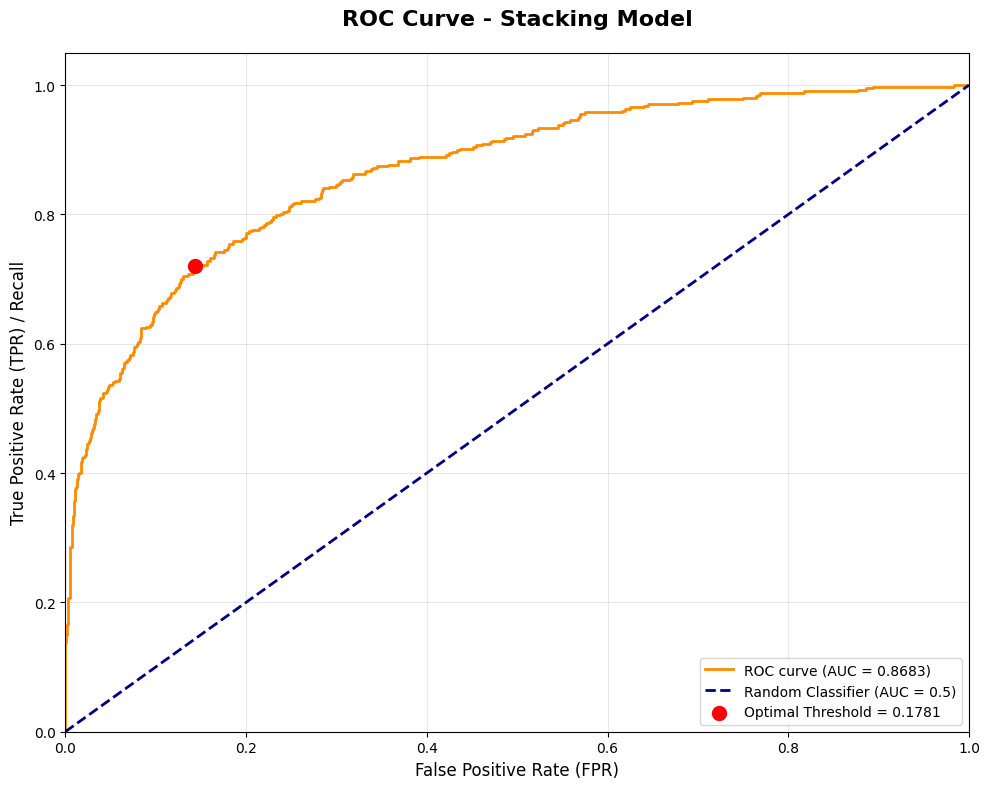


ROC Curve Analysis:
   AUC Score: 0.8683
   Optimal Threshold: 0.1781
   At optimal threshold:
      - True Positive Rate: 0.7199
      - False Positive Rate: 0.1431


In [94]:
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_proba_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=12)
plt.title('ROC Curve - Stacking Model', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', s=100, 
            label=f'Optimal Threshold = {optimal_threshold:.4f}', zorder=5)
plt.legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nROC Curve Analysis:")
print(f"   AUC Score: {roc_auc:.4f}")
print(f"   Optimal Threshold: {optimal_threshold:.4f}")
print(f"   At optimal threshold:")
print(f"      - True Positive Rate: {tpr[optimal_idx]:.4f}")
print(f"      - False Positive Rate: {fpr[optimal_idx]:.4f}")

## 5. Precision-Recall Curve

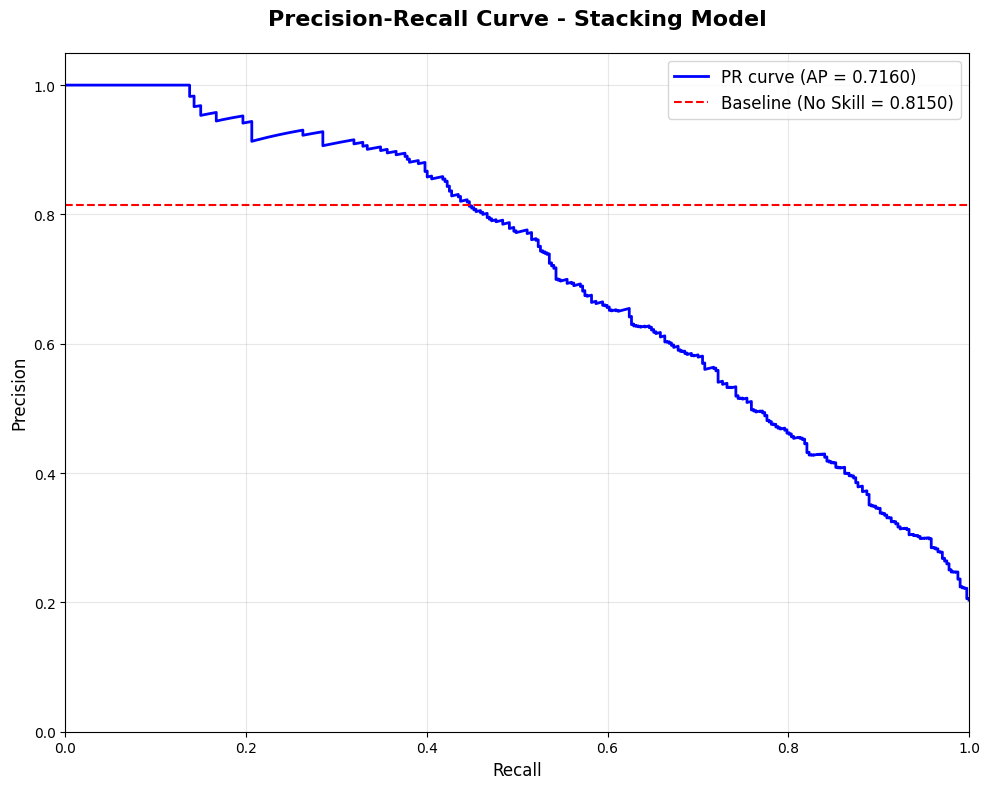


Precision-Recall Analysis:
   Average Precision Score: 0.7160
   Baseline (Random): 0.8150
   Improvement: -0.0990


In [95]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test_final, y_pred_proba_final)
avg_precision = average_precision_score(y_test_final, y_pred_proba_final)

plt.figure(figsize=(10, 8))
plt.plot(recall_curve, precision_curve, color='blue', lw=2, 
         label=f'PR curve (AP = {avg_precision:.4f})')
plt.axhline(y=counter_final[1]/len(y_test_final), color='red', linestyle='--', 
            label=f'Baseline (No Skill = {counter_final[1]/len(y_test_final):.4f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Stacking Model', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="upper right", fontsize=12)
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

print(f"\nPrecision-Recall Analysis:")
print(f"   Average Precision Score: {avg_precision:.4f}")
print(f"   Baseline (Random): {counter_final[1]/len(y_test_final):.4f}")
print(f"   Improvement: {(avg_precision - counter_final[1]/len(y_test_final)):.4f}")

## 6. So sánh hiệu suất các Base Learners

In [96]:
base_learner_results = []

for name, model in base_learners_final:
    model.fit(X_train_final, y_train_final)
    
    y_pred_base = model.predict(X_test_final)
    y_pred_proba_base = model.predict_proba(X_test_final)[:, 1]
    
    acc = accuracy_score(y_test_final, y_pred_base)
    f1 = f1_score(y_test_final, y_pred_base)
    auc_score = roc_auc_score(y_test_final, y_pred_proba_base)
    precision = precision_score(y_test_final, y_pred_base)
    recall = recall_score(y_test_final, y_pred_base)
    
    base_learner_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc_score
    })
    
    print(f"\n{name.upper()}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  AUC:       {auc_score:.4f}")

# Add Stacking model results
base_learner_results.append({
    'Model': 'Stacking',
    'Accuracy': accuracy_score(y_test_final, y_pred_final),
    'Precision': precision_1,
    'Recall': recall_1,
    'F1-Score': f1_1,
    'AUC': auc_score_final
})

print(f"\n{'STACKING (META-LEARNER)'}:")
print(f"  Accuracy:  {accuracy_score(y_test_final, y_pred_final):.4f}")
print(f"  Precision: {precision_1:.4f}")
print(f"  Recall:    {recall_1:.4f}")
print(f"  F1-Score:  {f1_1:.4f}")
print(f"  AUC:       {auc_score_final:.4f}")


RF:
  Accuracy:  0.8525
  Precision: 0.6600
  Recall:    0.5676
  F1-Score:  0.6103
  AUC:       0.8568

GB:
  Accuracy:  0.8690
  Precision: 0.7821
  Recall:    0.4939
  F1-Score:  0.6054
  AUC:       0.8702

ADA:
  Accuracy:  0.8560
  Precision: 0.7212
  Recall:    0.4767
  F1-Score:  0.5740
  AUC:       0.8551

SVC:
  Accuracy:  0.7890
  Precision: 0.4878
  Recall:    0.7396
  F1-Score:  0.5879
  AUC:       0.8499

GNB:
  Accuracy:  0.8110
  Precision: 0.5527
  Recall:    0.3735
  F1-Score:  0.4457
  AUC:       0.7770

KNN:
  Accuracy:  0.8235
  Precision: 0.6205
  Recall:    0.3415
  F1-Score:  0.4406
  AUC:       0.7535

XGB:
  Accuracy:  0.8315
  Precision: 0.5858
  Recall:    0.5872
  F1-Score:  0.5865
  AUC:       0.8398

LOGREG:
  Accuracy:  0.7135
  Precision: 0.3872
  Recall:    0.7002
  F1-Score:  0.4987
  AUC:       0.7771

STACKING (META-LEARNER):
  Accuracy:  0.8690
  Precision: 0.7736
  Recall:    0.5037
  F1-Score:  0.6101
  AUC:       0.8683


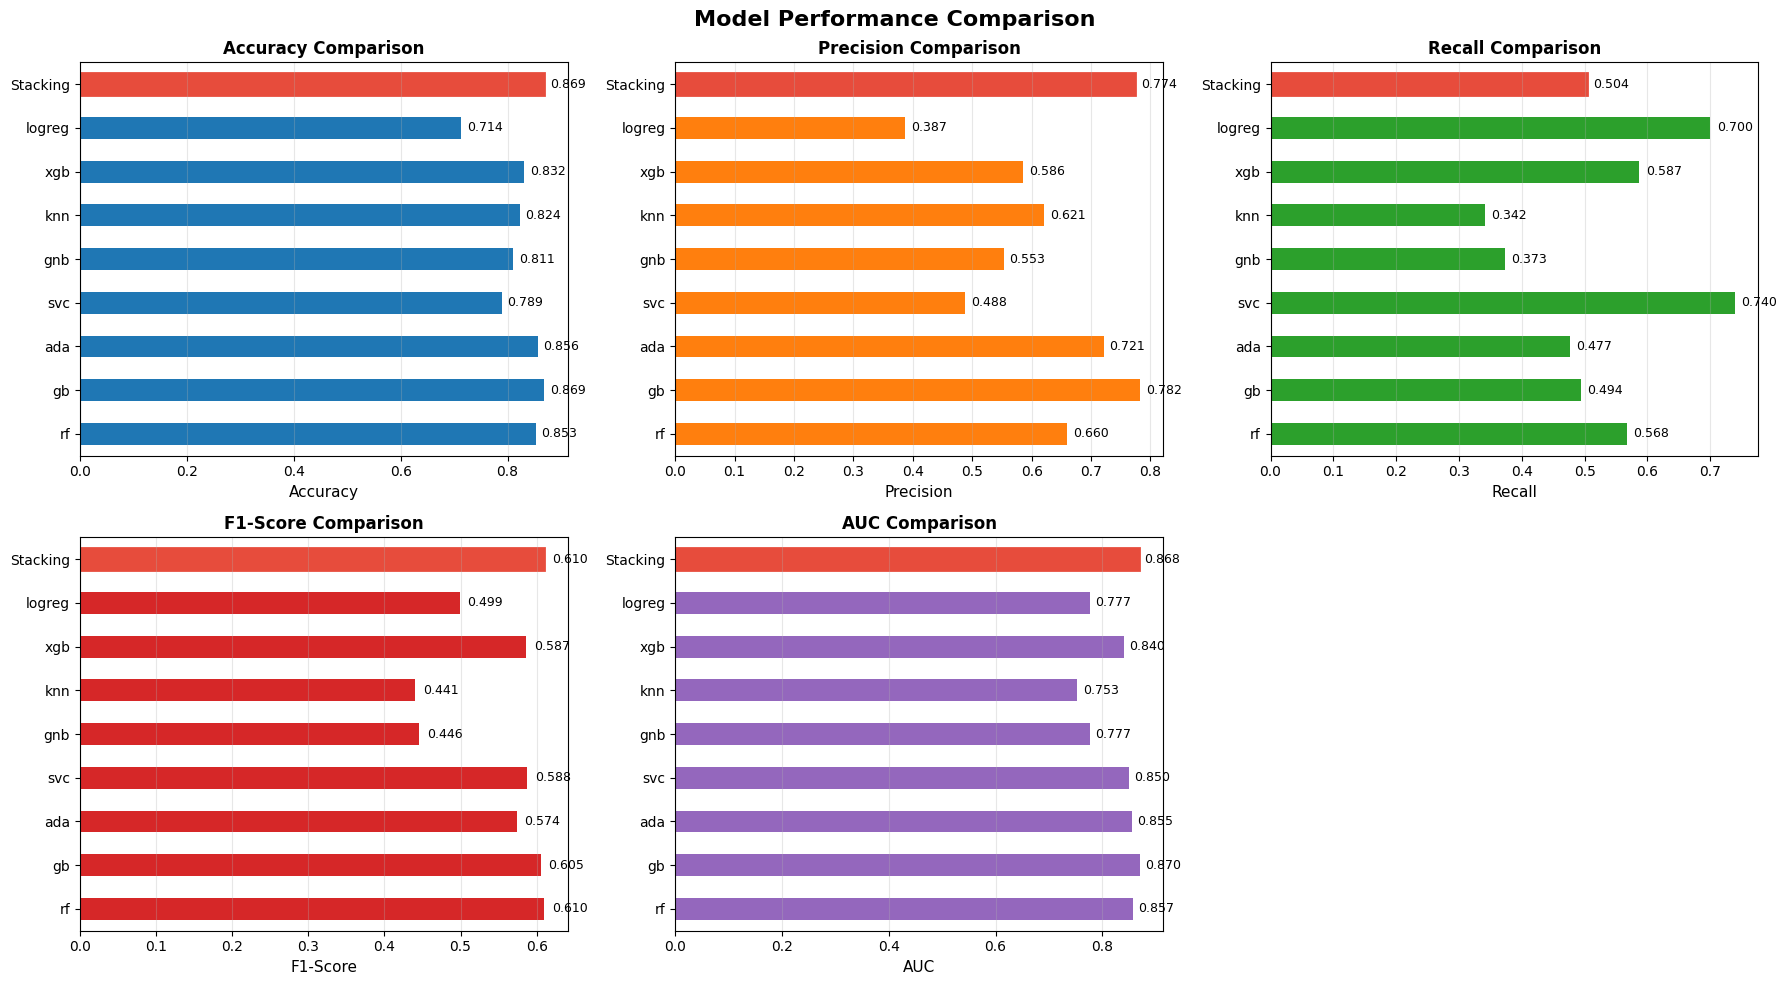


RESULTS SUMMARY TABLE
          Accuracy  Precision    Recall  F1-Score       AUC
Model                                                      
rf          0.8525   0.660000  0.567568  0.610304  0.856767
gb          0.8690   0.782101  0.493857  0.605422  0.870218
ada         0.8560   0.721190  0.476658  0.573964  0.855090
svc         0.7890   0.487844  0.739558  0.587891  0.849892
gnb         0.8110   0.552727  0.373464  0.445748  0.776965
knn         0.8235   0.620536  0.341523  0.440571  0.753463
xgb         0.8315   0.585784  0.587224  0.586503  0.839807
logreg      0.7135   0.387228  0.700246  0.498688  0.777096
Stacking    0.8690   0.773585  0.503686  0.610119  0.868281

Best model by metric:
   Accuracy: gb (0.8690)
   Precision: gb (0.7821)
   Recall: svc (0.7396)
   F1-Score: rf (0.6103)
   AUC: gb (0.8702)


In [97]:
results_df = pd.DataFrame(base_learner_results)
results_df = results_df.set_index('Model')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    bars = results_df[metric].plot(kind='barh', ax=ax, color=colors[idx])
    ax.set_xlabel(metric, fontsize=11)
    ax.set_ylabel('')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for i, (model_name, value) in enumerate(results_df[metric].items()):
        if model_name == 'Stacking':
            ax.get_children()[i].set_color('#e74c3c')
            ax.get_children()[i].set_linewidth(2)
    
    for i, v in enumerate(results_df[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("RESULTS SUMMARY TABLE")
print("="*80)
print(results_df.to_string())
print("\nBest model by metric:")
for metric in metrics:
    best_model = results_df[metric].idxmax()
    best_score = results_df[metric].max()
    print(f"   {metric}: {best_model} ({best_score:.4f})")

## 7. Phân tích sâu hơn về dữ liệu và Feature Importance

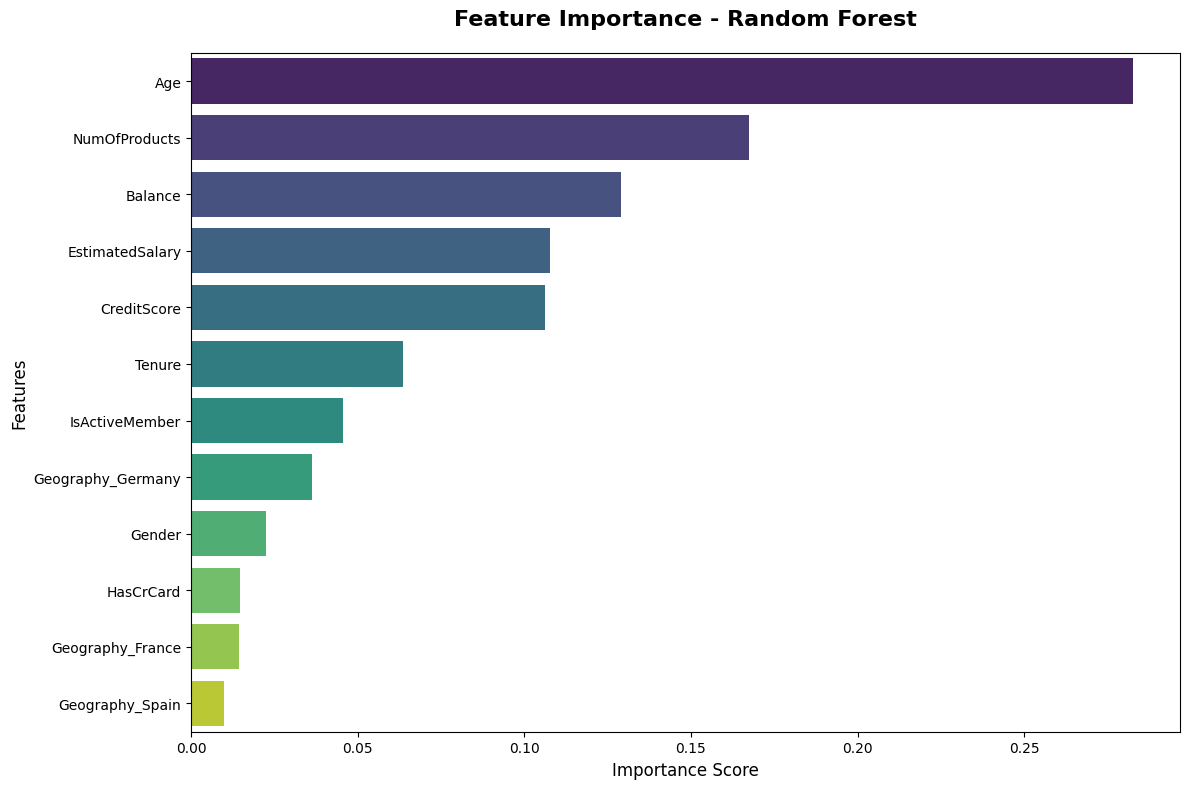


FEATURE IMPORTANCE RANKING
Age                      : 0.2826
NumOfProducts            : 0.1675
Balance                  : 0.1289
EstimatedSalary          : 0.1078
CreditScore              : 0.1063
Tenure                   : 0.0635
IsActiveMember           : 0.0457
Geography_Germany        : 0.0364
Gender                   : 0.0226
HasCrCard                : 0.0146
Geography_France         : 0.0143
Geography_Spain          : 0.0099

Top 5 most important features:
   1. Age
   2. NumOfProducts
   3. Balance
   4. EstimatedSalary
   5. CreditScore


In [98]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced')
rf_model.fit(X_train_final, y_train_final)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("FEATURE IMPORTANCE RANKING")
print("="*60)
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']:25s}: {row['Importance']:.4f}")

top_features = feature_importance.head(5)['Feature'].tolist()
print(f"\nTop 5 most important features:")
for i, feat in enumerate(top_features, 1):
    print(f"   {i}. {feat}")

## 8. Phân tích lỗi dự đoán (Error Analysis)

In [99]:
X_test_df = pd.DataFrame(X_test_final, columns=X.columns)
error_analysis_df = X_test_df.copy()
error_analysis_df['Actual'] = y_test_final
error_analysis_df['Predicted'] = y_pred_final
error_analysis_df['Probability_Churn'] = y_pred_proba_final
error_analysis_df['Correct'] = error_analysis_df['Actual'] == error_analysis_df['Predicted']

false_positives = error_analysis_df[(error_analysis_df['Actual'] == 0) & (error_analysis_df['Predicted'] == 1)]
false_negatives = error_analysis_df[(error_analysis_df['Actual'] == 1) & (error_analysis_df['Predicted'] == 0)]
true_positives = error_analysis_df[(error_analysis_df['Actual'] == 1) & (error_analysis_df['Predicted'] == 1)]
true_negatives = error_analysis_df[(error_analysis_df['Actual'] == 0) & (error_analysis_df['Predicted'] == 0)]

print(f"\nPrediction distribution:")
print(f"   True Negatives (Correctly predicted NOT churned):  {len(true_negatives):4d} ({len(true_negatives)/len(error_analysis_df)*100:.2f}%)")
print(f"   True Positives (Correctly predicted CHURNED):      {len(true_positives):4d} ({len(true_positives)/len(error_analysis_df)*100:.2f}%)")
print(f"   False Positives (Incorrectly predicted as churn):  {len(false_positives):4d} ({len(false_positives)/len(error_analysis_df)*100:.2f}%)")
print(f"   False Negatives (Missed churned customers):        {len(false_negatives):4d} ({len(false_negatives)/len(error_analysis_df)*100:.2f}%)")

if len(false_positives) > 0:
    print(f"\nCharacteristics of incorrectly predicted as churn (False Positives):")
    print(f"   Average Age: {false_positives['Age'].mean():.2f}")
    print(f"   Average Balance: {false_positives['Balance'].mean():.2f}")
    print(f"   Average Credit Score: {false_positives['CreditScore'].mean():.2f}")
    
if len(false_negatives) > 0:
    print(f"\nCharacteristics of MISSED customers (False Negatives):")
    print(f"   Average Age: {false_negatives['Age'].mean():.2f}")
    print(f"   Average Balance: {false_negatives['Balance'].mean():.2f}")
    print(f"   Average Credit Score: {false_negatives['CreditScore'].mean():.2f}")


Prediction distribution:
   True Negatives (Correctly predicted NOT churned):  1533 (76.65%)
   True Positives (Correctly predicted CHURNED):       205 (10.25%)
   False Positives (Incorrectly predicted as churn):    60 (3.00%)
   False Negatives (Missed churned customers):         202 (10.10%)

Characteristics of incorrectly predicted as churn (False Positives):
   Average Age: 0.82
   Average Balance: 0.22
   Average Credit Score: -0.20

Characteristics of MISSED customers (False Negatives):
   Average Age: 0.18
   Average Balance: 0.16
   Average Credit Score: 0.01
